# **Lending Club Case Study**



# Assignment : Lending Club Case Study

Team : Ashwini Pujar and Anu Augustine

Date : 23 OCT 2024

Understanding risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

## **Problem Statement**

* The goal of this project is to identify key patterns and factors that predict the likelihood of a borrower defaulting on a loan.
  By leveraging consumer attributes (such as age, income, and credit history) and loan attributes (such as loan amount, interest rate, and loan term), the   goal is to develop predictive insights into the behaviors and conditions that are most indicative of a borrower's propensity to default. These insights    will be used to inform decision-making processes for financial institutions, enabling actions such as:
  * Rejecting loan applications from individuals with a high probability of default.
  * Offering reduced loan amounts or higher interest rates to mitigate risk.
  * Tailoring loan conditions to better manage the risk associated with specific borrower profiles.

## Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#Importing dataset and checking the first 5 rows
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

## Data Inspection

In [4]:
#Check the shape of the dataframe
df.shape

(39717, 111)

In [5]:
#Dataframe information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Cleaning the data

In [7]:
# Before starting the analysis, it's important to filter the data to focus on loans that are fully paid or charged off.
# Loans that are still 'Current' won't be useful for this analysis.

# Display the count of different loan statuses
print(df['loan_status'].value_counts())

# Filter out rows where the loan status is 'Current'
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

df.head()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Mssing value check

In [8]:
# Count the number of completely empty rows (where all values are missing)
empty_rows = df.isnull().all(axis=1).sum()

# Output the result
print(f'Number of completely empty rows: {empty_rows}')

# Observation: There are no completely empty rows in the dataset


Number of completely empty rows: 0


In [9]:
#checking for empty columns (in %age)
round((100*df.isnull().sum())/len(df))

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

##### There are a lot of empty columns, lets first remove them.

In [10]:
#Drop columns with all NaN values and check the percentage of missing values:
df.dropna(axis=1, how='all', inplace=True)
round((100*df.isnull().sum())/len(df))



id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          32.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

The dataset contains two columns with high null percentage:

- mths_since_last_record
- mths_since_last_delinq
Also, the 'desc' column has 32% Null values and as per column definition, it is the "Loan description provided by the borrower". So, it will not add value to analysis.

These columns can be dropped.

In [11]:
#Drop columns with high percentage of NaN values
df.drop(labels=['mths_since_last_record','mths_since_last_delinq','desc'],axis=1,inplace=True)


In [12]:
df.shape

(38577, 53)

Columns containing only a single unique value won't provide useful insights for the analysis. Therefore, such columns should be identified and removed from the dataset to streamline the analysis process.

In [13]:
df.nunique().sort_values()

tax_liens                         1
initial_list_status               1
out_prncp                         1
out_prncp_inv                     1
collections_12_mths_ex_med        1
policy_code                       1
pymnt_plan                        1
application_type                  1
acc_now_delinq                    1
chargeoff_within_12_mths          1
delinq_amnt                       1
loan_status                       2
term                              2
verification_status               3
pub_rec_bankruptcies              3
home_ownership                    5
pub_rec                           5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                

In [14]:
# Get the list of columns where the unique values exactly 1.
columns_with_single_unique_values = df.columns[df.apply(lambda x: x.nunique() == 1)]
columns_with_single_unique_values

Index(['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'tax_liens'],
      dtype='object')

In [15]:
# drop the columns from the dataframe
df.drop(columns = columns_with_single_unique_values, inplace = True)

In [16]:
df.shape

(38577, 42)

There are three columns where each row contains unique values:

* id: A unique LendingClub-assigned ID for the loan listing.
* member_id: A unique LendingClub-assigned ID for the borrower.
* url: A link to the LendingClub page with the listing data.

Since these values are assigned at the time of application and don't offer meaningful insights for the loan analysis, these columns can also be dropped from the dataset.

In [17]:
# drop the three columns from the dataframe
df.drop(columns = ['id', 'member_id', 'url'], inplace = True)

Based on the data observed, it seems that the text columns emp_title and title may not contribute significantly to our analysis. 


In [18]:
# droping these 2 columns
df.drop(columns = ['title', 'emp_title'], inplace = True)

Upon reviewing the definitions of the individual columns, it becomes clear that the following columns either contain data available only after the     loan application is approved or lack significance for our analysis:

* **delinq_2yrs**: The number of incidences of delinquency (30+ days past due) in the borrower’s credit file over the past 2 years — data collected after     loan approval.
* **last_pymnt_d**: The date when the last payment was received — data collected after loan approval.
* **last_credit_pull_d**: The most recent month LendingClub pulled credit for this loan — data collected after loan approval.
* **total_rec_late_fee**: Total late fees received to date — data collected after loan approval.
* **collection_recovery_fee**: Collection fee charged post-charge-off — data collected after loan approval.
* **recoveries**: Gross recovery amount post-charge-off — data collected after loan approval.
* **total_rec_prncp**: Total principal received to date — data collected after loan approval.
* **revol_bal**: Total revolving credit balance — data collected after loan approval.
* **total_rec_int**: Total interest received to date — data collected after loan approval.
* **last_pymnt_amnt**: Total amount of the last payment received — data collected after loan approval.
* **total_pymnt_inv**: Total payments received to date for the portion funded by investors — data collected after loan approval.
* **total_pymnt**: Total payments received to date for the entire amount funded — data collected after loan approval.
* **inq_last_6mths**: Number of inquiries in the past 6 months (excluding auto and mortgage inquiries) — data collected after loan approval.
* **zip_code**: The first three digits of the borrower's zip code — has similar significance to the addr_state column.
* **earliest_cr_line**: The month the borrower’s earliest reported credit line was opened — does not impact loan repayment.


Given this context, these columns may not be relevant to our analysis and should be considered for removal.

In [19]:
df.drop(columns = ['delinq_2yrs', 'last_pymnt_d', 'last_credit_pull_d', 'total_rec_late_fee', 'collection_recovery_fee', 'recoveries', 'total_rec_prncp', 'revol_bal', 'total_rec_int', 'last_pymnt_amnt', 'total_pymnt_inv', 'total_pymnt', 'inq_last_6mths', 'zip_code', 'earliest_cr_line'], inplace = True)

In [20]:
df.shape

(38577, 22)

#### Missing values

In [21]:
## Check percentage of missing data
((df.isnull().sum() * 100 / len(df)).sort_values(
    ascending=False)).head(11)

emp_length              2.677761
pub_rec_bankruptcies    1.806776
revol_util              0.129611
issue_d                 0.000000
total_acc               0.000000
pub_rec                 0.000000
open_acc                0.000000
dti                     0.000000
addr_state              0.000000
purpose                 0.000000
loan_status             0.000000
dtype: float64

columns with missing values are "emp_length","pub_rec_bankruptcies", "revol_util". Before proceeding with further analysis, let's examine the data type


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   funded_amnt           38577 non-null  int64  
 2   funded_amnt_inv       38577 non-null  float64
 3   term                  38577 non-null  object 
 4   int_rate              38577 non-null  object 
 5   installment           38577 non-null  float64
 6   grade                 38577 non-null  object 
 7   sub_grade             38577 non-null  object 
 8   emp_length            37544 non-null  object 
 9   home_ownership        38577 non-null  object 
 10  annual_inc            38577 non-null  float64
 11  verification_status   38577 non-null  object 
 12  issue_d               38577 non-null  object 
 13  loan_status           38577 non-null  object 
 14  purpose               38577 non-null  object 
 15  addr_state            38

In [23]:
print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


emp_length
10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

In [24]:
# Number of unique values
print('\nNumber of unique values: ')
print(df[["emp_length", "revol_util", "pub_rec_bankruptcies"]].nunique())


Number of unique values: 
emp_length                11
revol_util              1088
pub_rec_bankruptcies       3
dtype: int64


Since emp_length is categorical feature missing value can be replaced with mode.
Even pub_rec_bankruptcies is numericla,it has just three unique values,d mode acts as best estimator for replacement.an


In [25]:
# Missing value treatment
# Replacing with mode for emp_length and pub_rec_bankruptcies

df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.emp_length.isna().sum()

0

In [26]:

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].mode()[0])
df.pub_rec_bankruptcies.isna().sum()

0

In [27]:
 #Remove rows from the DataFrame where the 'revol_util' column has missing values (NaN)
df.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
df.revol_util.isna().sum()

0

In [28]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
open_acc                0
pub_rec                 0
revol_util              0
total_acc               0
pub_rec_bankruptcies    0
dtype: int64

In [29]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,0,83.70%,9,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,0,9.40%,4,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,98.50%,10,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,10,0,21%,37,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,9,0,28.30%,12,0.0


### From the above DataFrame, it’s logical to remove the percentage sign from the int_rate and revol_util columns and convert them to numeric data types for further analysis.

### int_rate and revol_util columns

In [30]:
df['int_rate'] = df['int_rate'].astype(str).str.rstrip('%')
df['revol_util'] = df['revol_util'].astype(str).str.rstrip('%')

# Convert the cleaned columns to numeric data types
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
df['revol_util'] = pd.to_numeric(df['revol_util'], errors='coerce')


In [31]:
print(df[['int_rate', 'revol_util']].dtypes)

int_rate      float64
revol_util    float64
dtype: object


## term_months

In [32]:
#Create a new column 'term_months' by removing the 'months' string from the 'term' column.
#This allows us to convert the term duration into a numeric format for analysis.
#Then, delete the original 'term' column as it is no longer needed

df['term_months'] = df['term'].str.rstrip('months')
del df['term']


In [33]:
df['term_months'] = pd.to_numeric(df['term_months'])

# Verify the change
print(df['term_months'].dtype)

int64


## emp_length_years

In [34]:
# Create a new column 'emp_length_years' by removing the 'years ' string from the 'emp_length' column.
# This transforms the employment length into a numeric format for easier analysis.
# Replace the value '10+' with '10' to standardize the representation of employment duration.
# Replace the value '< 1' with '0.5' to represent less than one year as half a year.
# Finally, delete the original 'emp_length' column as it is no longer needed.

df['emp_length_years'] = df['emp_length'].str.rstrip('years ')
df['emp_length_years'].replace({'10+': '10'}, inplace=True)
df['emp_length_years'][df['emp_length_years'] == '< 1'] = '0.5'
del df['emp_length']
# Convert 'emp_length_years' to numeric
df['emp_length_years'] = pd.to_numeric(df['emp_length_years'])

# Verify the change
print(df['emp_length_years'].dtype)

float64


In [35]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,term_months,emp_length_years
0,5000,5000,4975.0,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,3,0,83.7,9,0.0,36,10.0
1,2500,2500,2500.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,3,0,9.4,4,0.0,60,0.5
2,2400,2400,2400.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,2,0,98.5,10,0.0,36,10.0
3,10000,10000,10000.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,10,0,21.0,37,0.0,36,10.0
5,5000,5000,5000.0,7.90,156.46,A,A4,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,9,0,28.3,12,0.0,36,3.0


## Converting the date 

In [36]:
# Data casting to datetime format:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Data after casting:
print('\nData after casting: ')
print(df['issue_d'].head())


Data after casting: 
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


### Deriving year and month

In [37]:
# Derivng year attribute
df['issue_year']=df['issue_d'].dt.year

# Deriving month attribute
df['issue_month']=df['issue_d'].dt.month

# Data with derived columns
print('Data sample with derived columns: ')
df[['issue_d', 'issue_year', 'issue_month']].head()

Data sample with derived columns: 


,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
5,2011-12-01,2011,12


In [38]:
#convert loan status data into numerical data i.e. Fully Paid = 0 and Charged Off = 1
df['loan_status']=df['loan_status'].map({'Fully Paid':0,'Charged Off':1})
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,term_months,emp_length_years,issue_year,issue_month
0,5000,5000,4975.0,10.65,162.87,B,B2,RENT,24000.0,Verified,2011-12-01,0,credit_card,AZ,27.65,3,0,83.7,9,0.0,36,10.0,2011,12
1,2500,2500,2500.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,3,0,9.4,4,0.0,60,0.5,2011,12
2,2400,2400,2400.0,15.96,84.33,C,C5,RENT,12252.0,Not Verified,2011-12-01,0,small_business,IL,8.72,2,0,98.5,10,0.0,36,10.0,2011,12
3,10000,10000,10000.0,13.49,339.31,C,C1,RENT,49200.0,Source Verified,2011-12-01,0,other,CA,20.00,10,0,21.0,37,0.0,36,10.0,2011,12
5,5000,5000,5000.0,7.90,156.46,A,A4,RENT,36000.0,Source Verified,2011-12-01,0,wedding,AZ,11.20,9,0,28.3,12,0.0,36,3.0,2011,12


## Checking Categorical and Numerical data

In [39]:
numeric_data = df.select_dtypes(include=[np.number])

categorical_data = df.select_dtypes(exclude=[np.number])



# Print the number of features for each data type.
print('There are {0} numerical, {1} categorical'.\
     format(numeric_data.shape[1], categorical_data.shape[1]))

There are 17 numerical, 7 categorical


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38527 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38527 non-null  int64         
 1   funded_amnt           38527 non-null  int64         
 2   funded_amnt_inv       38527 non-null  float64       
 3   int_rate              38527 non-null  float64       
 4   installment           38527 non-null  float64       
 5   grade                 38527 non-null  object        
 6   sub_grade             38527 non-null  object        
 7   home_ownership        38527 non-null  object        
 8   annual_inc            38527 non-null  float64       
 9   verification_status   38527 non-null  object        
 10  issue_d               38527 non-null  datetime64[ns]
 11  loan_status           38527 non-null  int64         
 12  purpose               38527 non-null  object        
 13  addr_state           

In [41]:
numeric_col = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","loan_status","dti","open_acc","pub_rec","revol_util","total_acc","pub_rec_bankruptcies","term_months","emp_length_years","issue_year","issue_month"]
categorical_col=["grade","sub_grade","home_ownership","verification_status","purpose","addr_state"]


## Outliers Analysis Using Boxplot

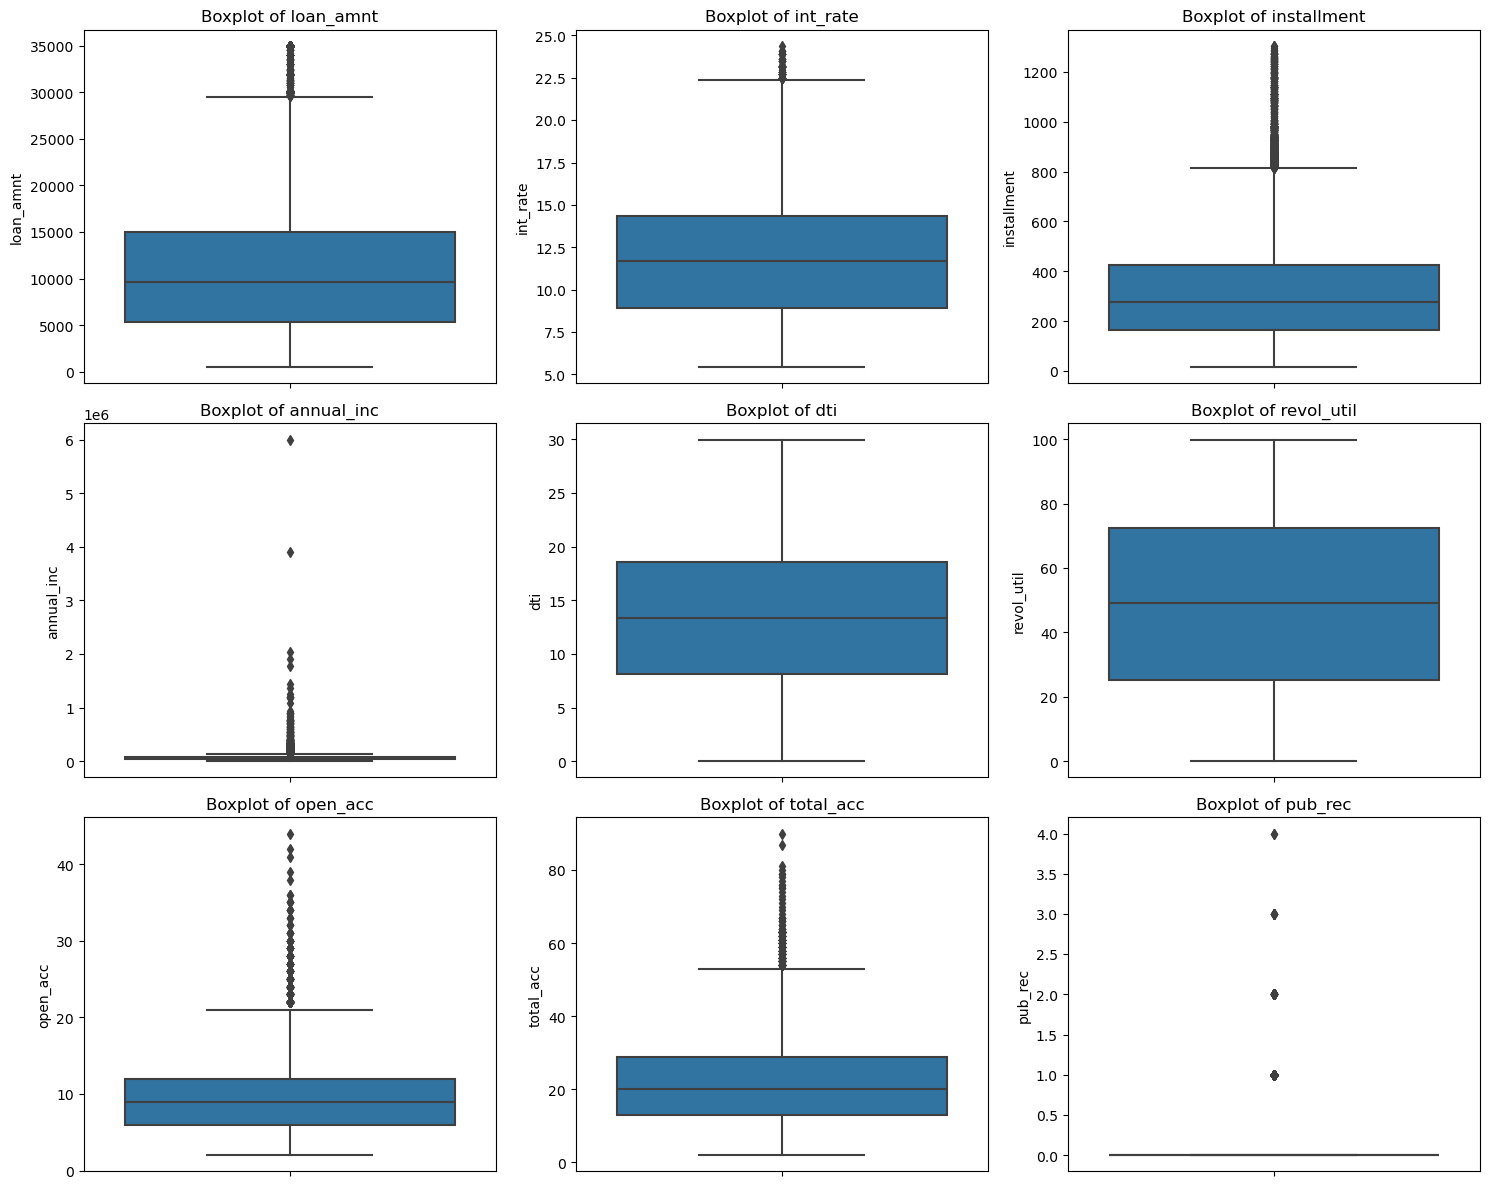

In [42]:
outlier_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc', 'pub_rec']

# Calculate the number of rows required for the grid (3 columns per row)
total_cols = len(outlier_columns)
rows = (total_cols // 3) + (total_cols % 3 > 0)  # Number of rows

# Set the figure size and plot the boxplots
plt.figure(figsize=(15, rows * 4))  # Adjust the height according to the number of rows
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, 3, i)  # Create subplots dynamically
    sns.boxplot(data=df, y=col)  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [43]:
# Function to identify and treat outliers using the IQR method
def treat_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with lower and upper bounds
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

# Apply the outlier treatment function only to specified columns
df = treat_outliers(df, outlier_columns)

print(df[outlier_columns].describe())

          loan_amnt      int_rate   installment     annual_inc           dti  \
count  38527.000000  38527.000000  38527.000000   38527.000000  38527.000000   
mean   10955.017585     11.926056    319.002436   65079.088778     13.276353   
std     7055.598304      3.686196    197.647790   32642.612651      6.671392   
min      500.000000      5.420000     15.690000    4000.000000      0.000000   
25%     5325.000000      8.940000    165.740000   40000.000000      8.140000   
50%     9600.000000     11.710000    278.150000   59000.000000     13.370000   
75%    15000.000000     14.350000    425.860000   82000.000000     18.560000   
max    29512.500000     22.465000    816.040000  145000.000000     29.990000   

         revol_util      open_acc     total_acc  pub_rec  
count  38527.000000  38527.000000  38527.000000  38527.0  
mean      48.702777      9.233187     21.981831      0.0  
std       28.364741      4.231488     11.148816      0.0  
min        0.000000      2.000000      2.00

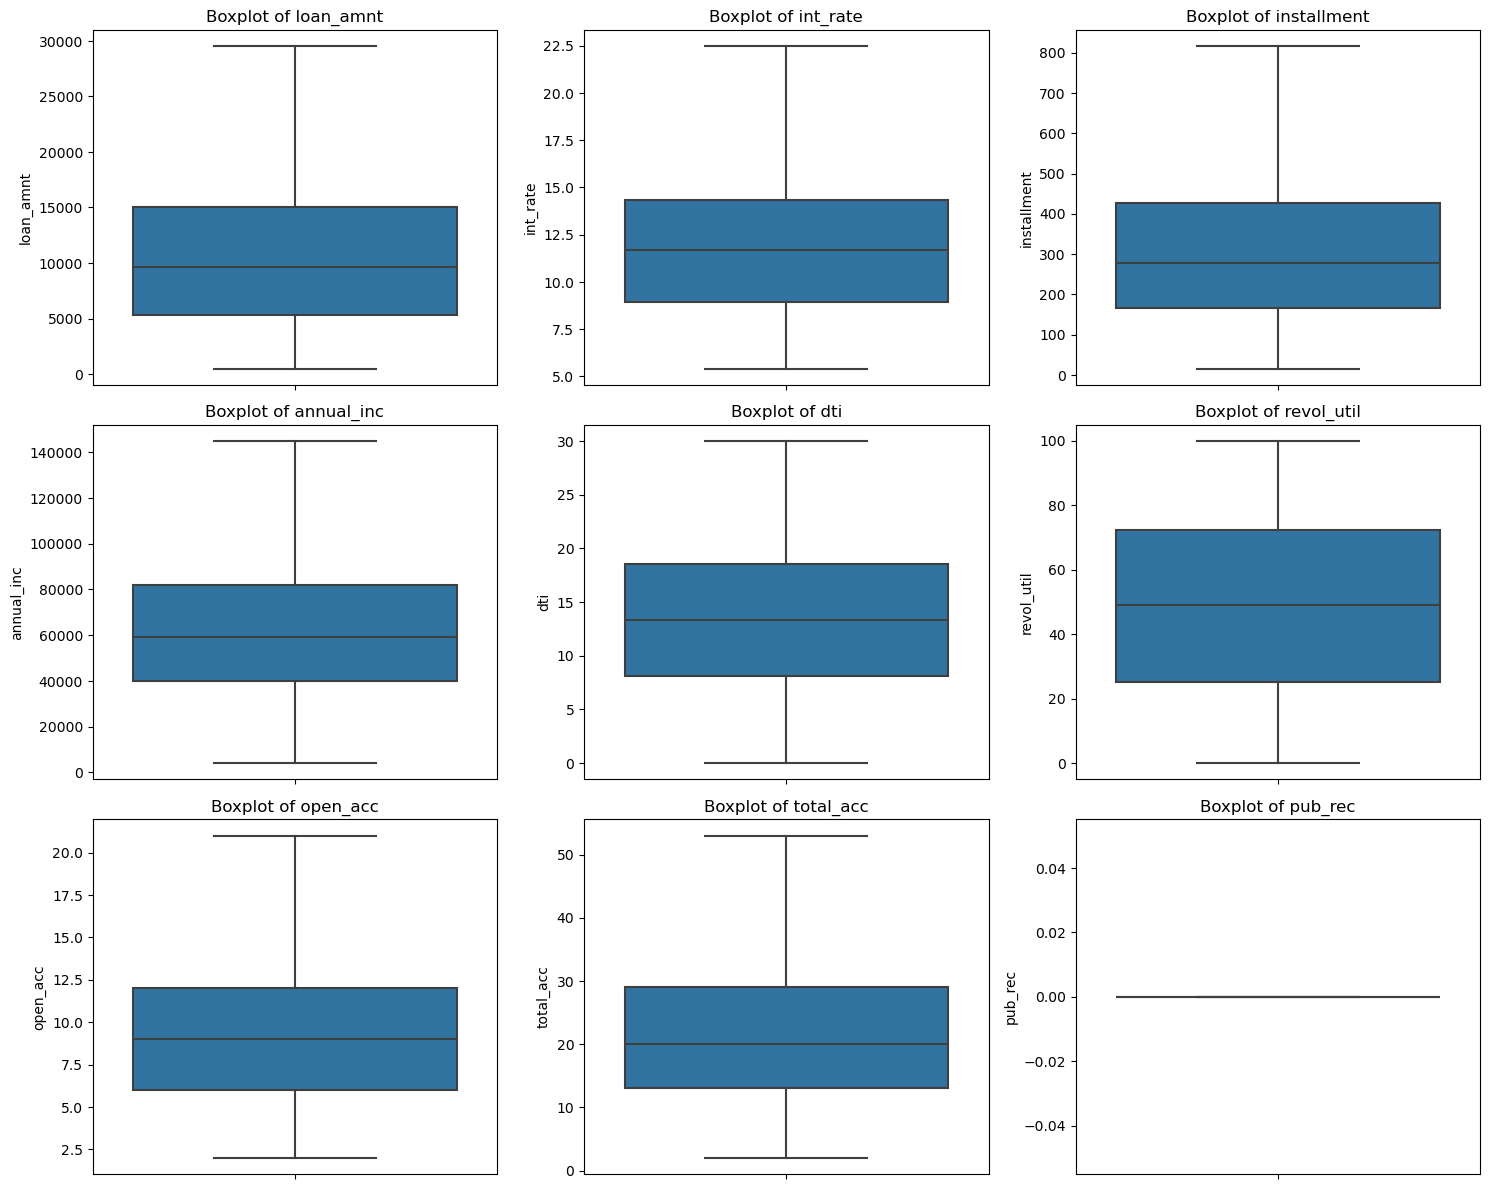

In [44]:
# Calculate the number of rows required for the grid (3 columns per row)
total_cols = len(outlier_columns)
rows = (total_cols // 3) + (total_cols % 3 > 0)  # Number of rows

# Set the figure size and plot the boxplots
plt.figure(figsize=(15, rows * 4))  # Adjust the height according to the number of rows
for i, col in enumerate(outlier_columns, 1):
    plt.subplot(rows, 3, i)  # Create subplots dynamically
    sns.boxplot(data=df, y=col)  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set title for each plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Univariate Analysis

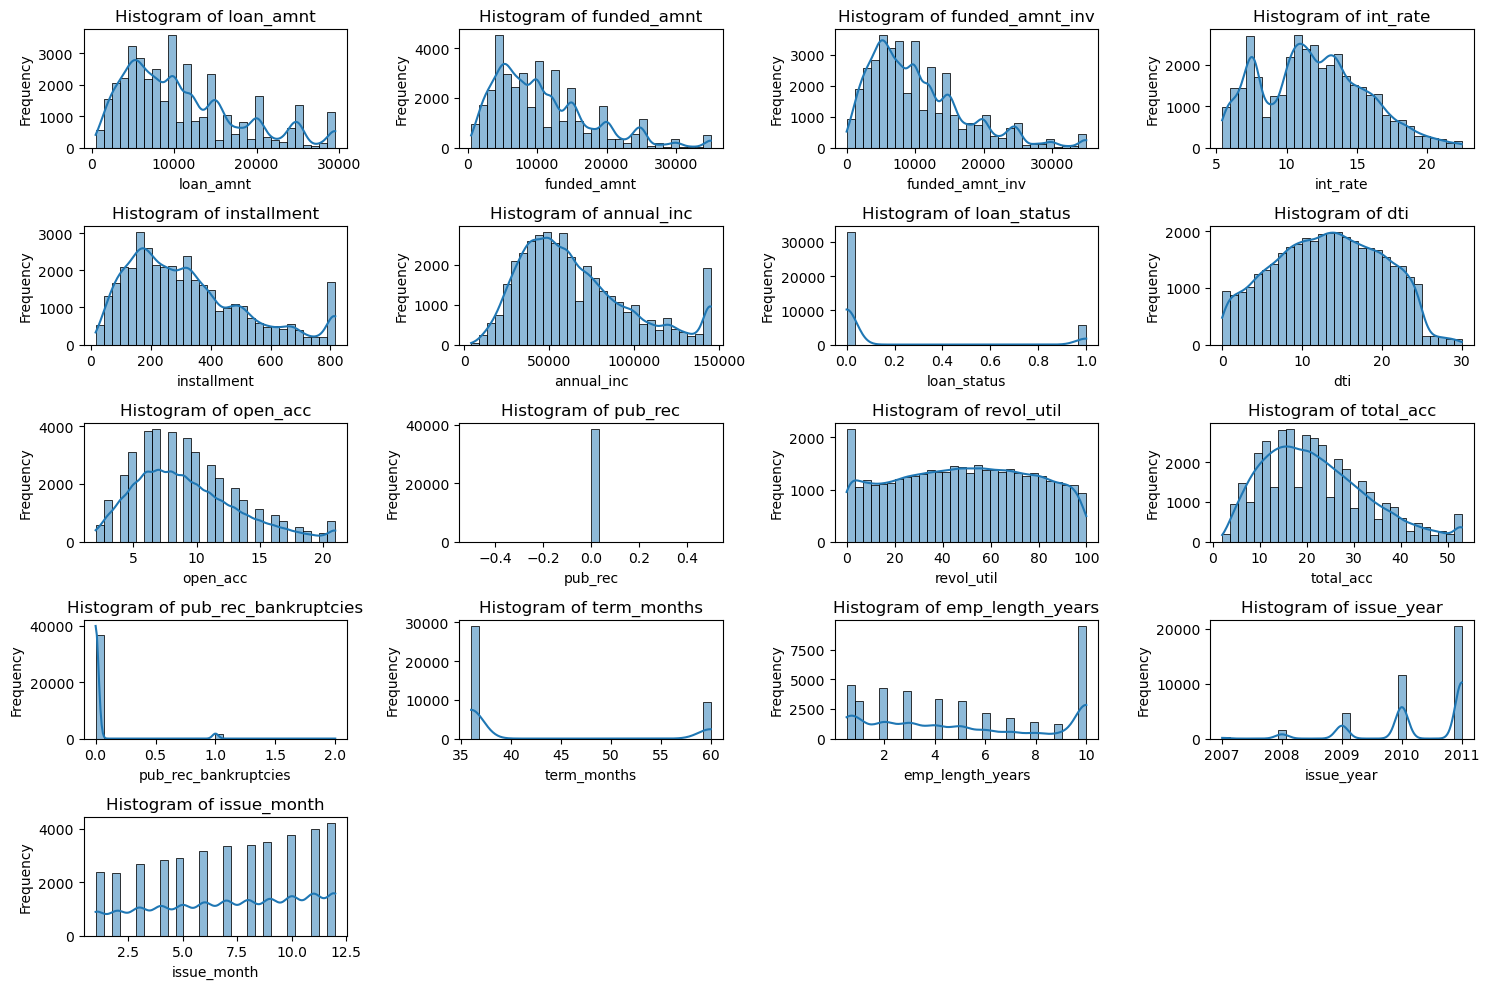

In [45]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each numeric column and create a histogram
for i, col in enumerate(numeric_col, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.histplot(df[col], bins=30, kde=True)  # 'kde=True' adds a Kernel Density Estimate
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

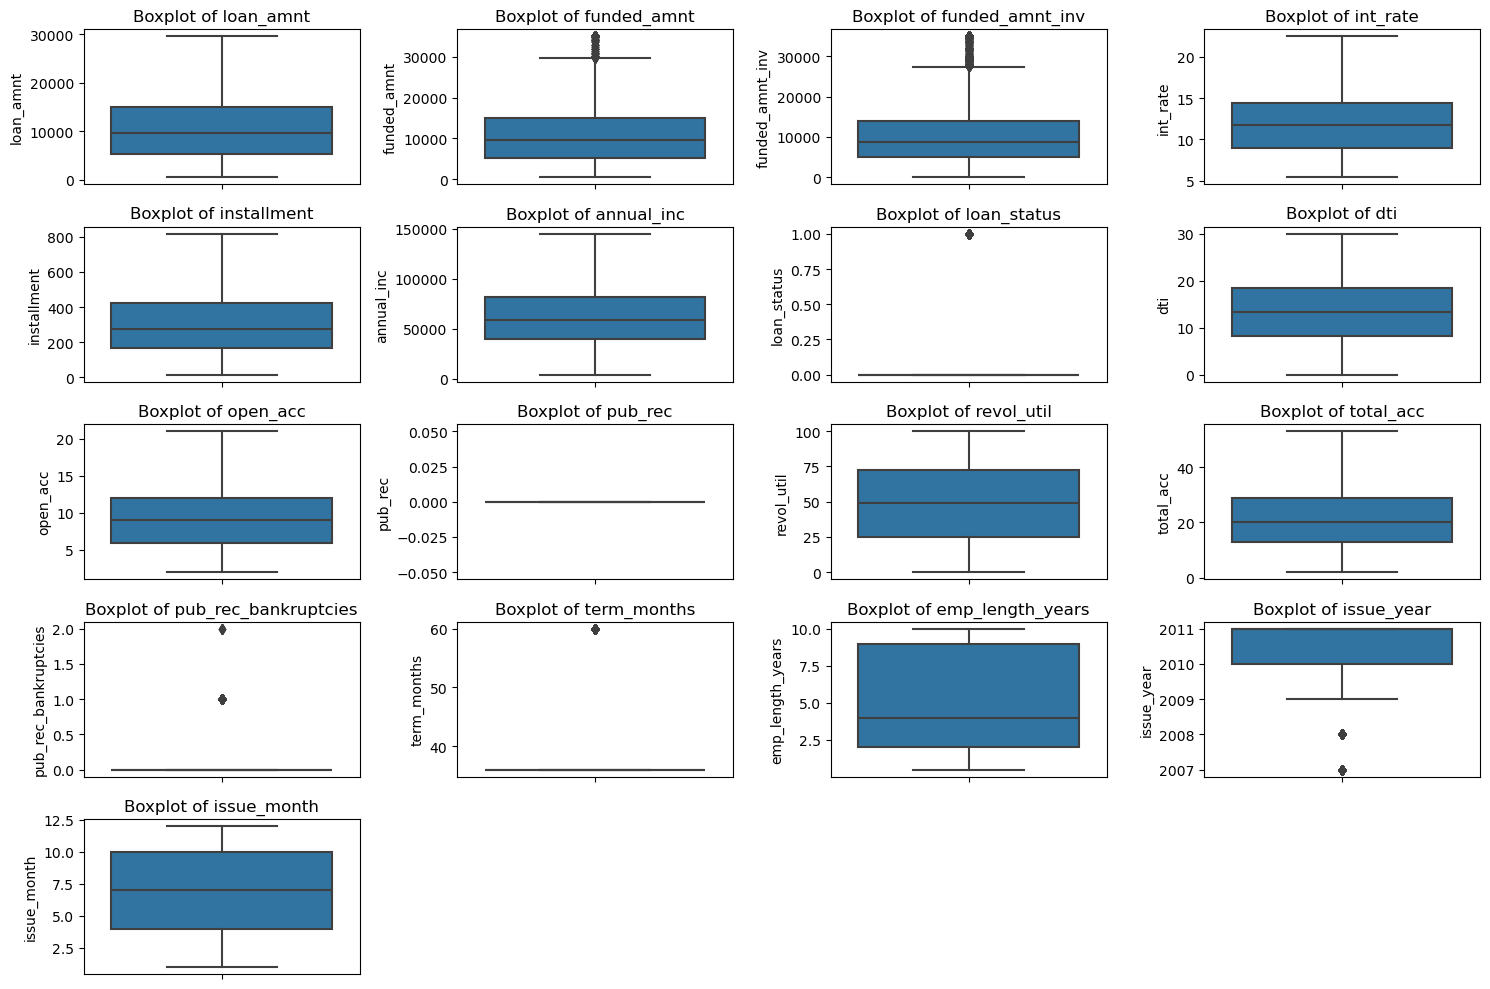

In [86]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_col, 1):
    plt.subplot(5, 4, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(data=df, y=col)  # Create a boxplot for each numeric column
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

# Adjust layout
plt.tight_layout()
plt.show()

In [47]:
df.loan_amnt.describe()

count    38527.000000
mean     10955.017585
std       7055.598304
min        500.000000
25%       5325.000000
50%       9600.000000
75%      15000.000000
max      29512.500000
Name: loan_amnt, dtype: float64

In [48]:
df.int_rate.describe()

count    38527.000000
mean        11.926056
std          3.686196
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         22.465000
Name: int_rate, dtype: float64

# **Inferences**: 
* **Loan amounts**: generally cluster around 10,000 to 15,000. There is a long tail, meaning a few loans exceed 30,000.
* The loan amount varies from 0 to 35,000 having median of 10,000
* The interquartile range (IQR) spans from about 5,000 to 15,000, suggesting that most loans fall within this range
* Loans with higher amounts (above     20,000) may indicate greater risk. These larger loans may be harder for borrowers to repay, especially if their income does not sufficiently            support the debt.
* **Interest rate**: The distribution peaks around 10-15%, indicating that most loans have moderate interest rates.
    There is a steep drop-off after 20%, suggesting very few loans have extremely high interest rates.
    The median interest rate is around 12%, with most interest rates ranging from 9% to 14%.
  Loans with higher interest rates (above 14%)          might be associated with higher risk, as these rates are often given to borrowers with lower credit scores or a higher chance of default.
* **DTI**: Most borrowers have a DTI ratio between 10 and 20%, with a notable drop-off around 30%.Borrowers with a higher DTI (closer to 30%) may           struggle more with repayment as they have a significant portion of their income already tied up in other debts. Higher DTI is often a strong            predictor of default.
* **Public Records and Bankruptcies**: The graphs show that while most borrowers have no public records, those with even one recorded bankruptcy are        more likely to face financial difficulties.
* **Revolving Credit Utilization**: Revolving credit utilization is spread fairly evenly up to 100%, but most borrowers use around 30-60% of their          available credit.Few borrowers are maxing out their credit lines.Borrowers using a high percentage of their available credit (closer to 100%) are       typically more financially stressed, which increases the likelihood of default
* **Employment Length** :Employment lengths are varied, with a large number of borrowers having 0-5 years of employment with a peak at 10                   years.Borrowers with shorter employment histories (0-5 years) might be at greater risk of defaulting due to lower job stability.
* **Loan Term**:Loan terms are either 36 months or 60 months, with more loans taken for the shorter term. Borrowers opting for longer loan terms (60        months) could have a higher chance of default, as a longer repayment period may mean the borrower has less immediate financial flexibility,             potentially making them more vulnerable over time
* **Annual Income**:The distribution of annual income is skewed, with most borrowers earning between 50,000 and 100,000.A few outliers earn                 significantly higher incomes
    Borrowers with lower incomes (less than 50,000) may have a higher risk of default, especially when paired with high loan amounts or high DTI. In       contrast, higher income (above 100,000) might be correlated with lower default risk due to better financial stability.
  

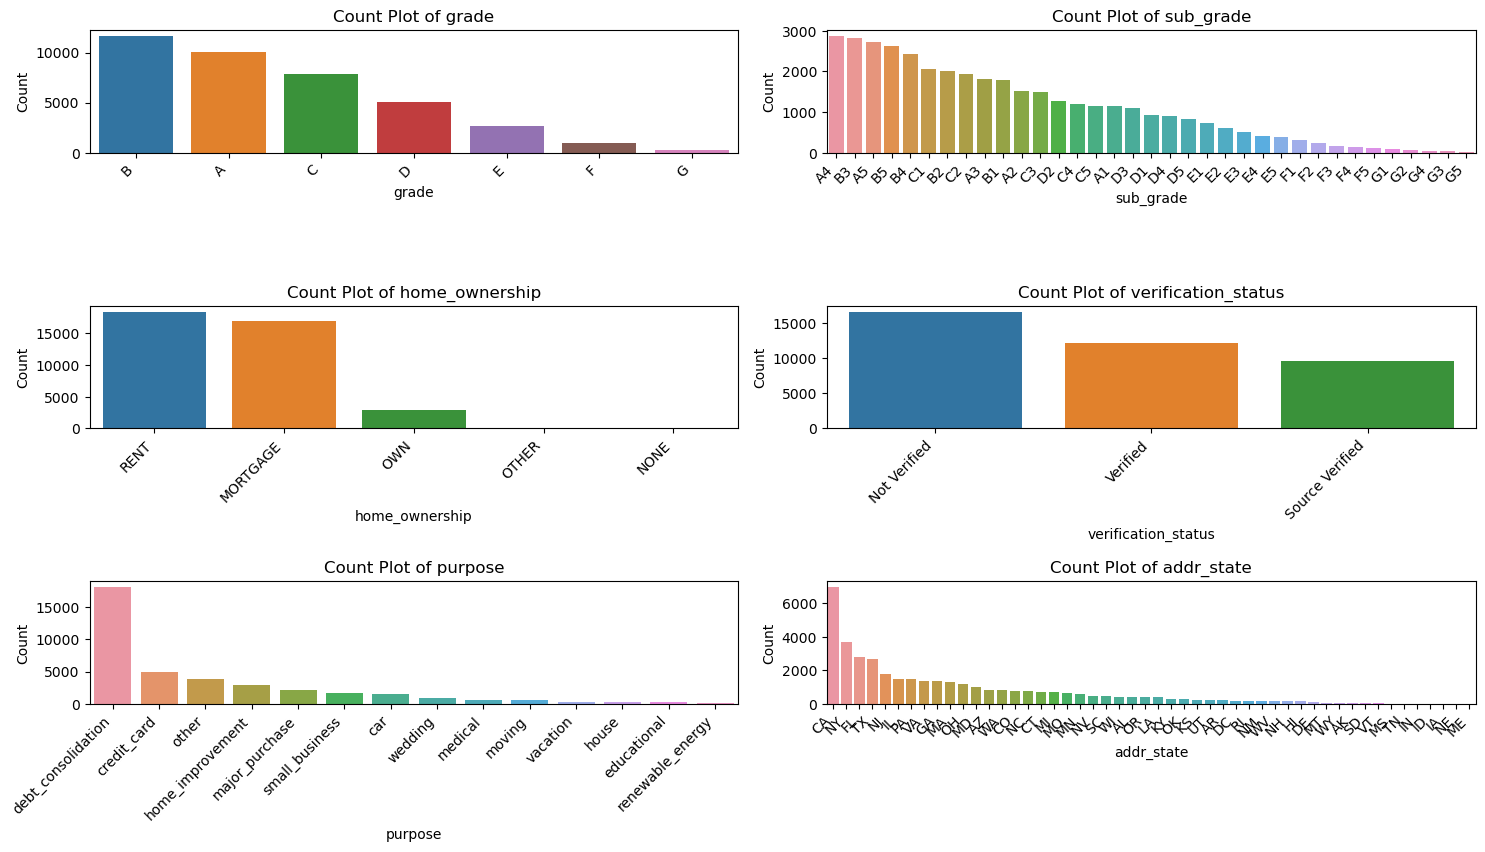

In [49]:
plt.figure(figsize=(15, 10))

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_col, 1):
    plt.subplot(4, 2, i)  # Adjust the number of rows and columns as needed
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)  # Create a countplot for each categorical column
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

## Inferences:
* **Credit Grade and Sub-Grade**: Borrowers with lower grades (C, D, F) are higher risk, potentially needing stricter loan terms or rejection.
* **Homeownership**: Renters may present more risk than homeowners, suggesting the need for tailored conditions.
* **Loan Purpose**: Debt consolidation loans, being most common, may involve higher risk.
* **Verification Status**: Unverified borrowers carry higher risk.
* **Geographic Factors**: Regional economic conditions can influence default rates.

# Bivariate Analysis

In [50]:
#create a separate dataframe of defaulters
defaulters_df=df.loc[df['loan_status']==1]
defaulters_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,term_months,emp_length_years,issue_year,issue_month
1,2500.0,2500,2500.0,15.27,59.83,C,C4,RENT,30000.0,Source Verified,2011-12-01,1,car,GA,1.00,3,0,9.4,4,0.0,60,0.5,2011,12
8,5600.0,5600,5600.0,21.28,152.39,F,F2,OWN,40000.0,Source Verified,2011-12-01,1,small_business,CA,5.55,11,0,32.6,13,0.0,60,4.0,2011,12
9,5375.0,5375,5350.0,12.69,121.45,B,B5,RENT,15000.0,Verified,2011-12-01,1,other,TX,18.08,2,0,36.5,3,0.0,60,0.5,2011,12
12,9000.0,9000,9000.0,13.49,305.38,C,C1,RENT,30000.0,Source Verified,2011-12-01,1,debt_consolidation,VA,10.08,4,0,91.7,9,0.0,36,0.5,2011,12
14,10000.0,10000,10000.0,10.65,325.74,B,B2,RENT,100000.0,Source Verified,2011-12-01,1,other,CA,7.06,14,0,55.5,29,0.0,36,3.0,2011,12


In [100]:
#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/df['grade'].value_counts(),2))
grade_df.rename(columns={grade_df.columns[0]:'defaulter_perc'},inplace=True)

grade_df

,defaulter_perc
grade,
A,5.99
B,12.21
C,17.17
D,22.00
E,26.81
F,32.58
G,33.33


## Risk Analysis of Defaulters acc. to Grades

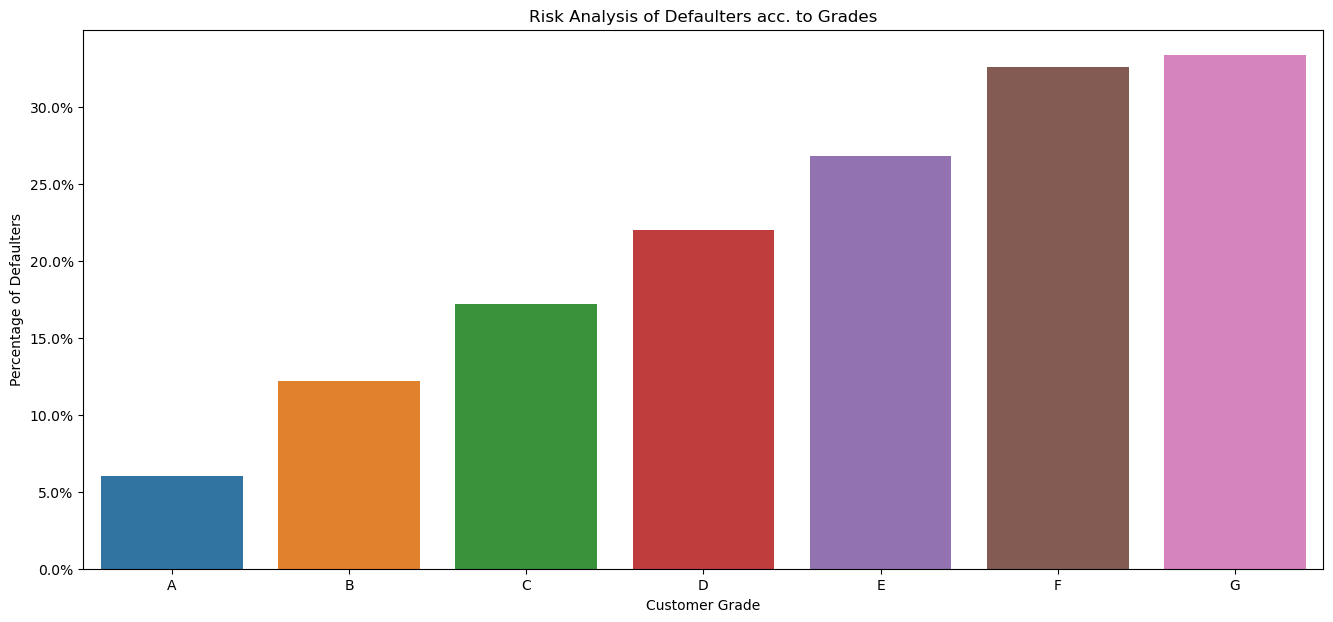

In [102]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sns.barplot(x=grade_df.index,y='defaulter_perc',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

##### Inferences:
* Higher Default Rates for Lower Grades: Customers with lower grades (e.g., G) have a significantly higher percentage of defaulters compared to those with higher grades (e.g., A).
* Borrowers with lower grades are more likely to default, indicating a need for stricter loan approval criteria for these grades
  

## Percentage of Loan Defaulters by Purpose

In [77]:
# Calculate the percentage of loan defaulters according to loan purpose
purpose_df = pd.DataFrame({
    'count': round((100 * defaulters_df['purpose'].value_counts()) / df['purpose'].value_counts(), 2)
})

# Sort the DataFrame by 'count' in descending order
purpose_df.sort_values(by='count', ascending=False, inplace=True)

# Resetting the index to make 'purpose' a column instead of an index
purpose_df.reset_index(inplace=True)
purpose_df.rename(columns={'index': 'purpose'}, inplace=True)
purpose_df


,purpose,count
0,small_business,27.10
1,renewable_energy,18.63
2,educational,17.39
3,other,16.33
4,house,16.08
5,moving,16.03
6,medical,15.46
7,debt_consolidation,15.31
8,vacation,14.17
9,home_improvement,11.99


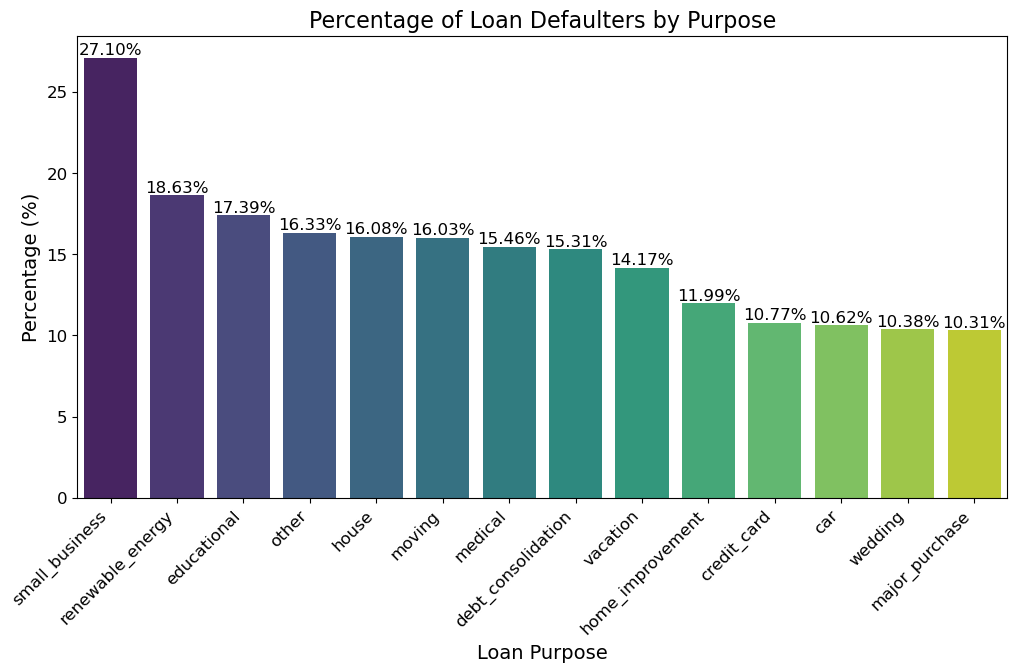

In [83]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='purpose', y='count', data=purpose_df, palette='viridis')
ax.set_title('Percentage of Loan Defaulters by Purpose', fontsize=16)
ax.set_xlabel('Loan Purpose', fontsize=14)
ax.set_ylabel('Percentage (%)', fontsize=14)

# Set the font size for tick labels
ax.tick_params(axis='both', labelsize=12)

# Displaying percentage on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.show()

##### Inferences:
Loans for purposes like small business (27.10%) and renewable energy (18.63%) have significantly higher default rates, indicating that borrowers may face unique financial challenges. In contrast, lower default rates in categories such as home improvement (11.99%) and vacation (14.17%) suggest more financially stable borrowers

## Risk Analysis of Defaulters acc. Employee Exp

In [92]:
emp_df = pd.DataFrame(data=round((100 * defaulters_df['emp_length_years'].value_counts()) / df['emp_length_years'].value_counts(), 2))
# Rename the single column to 'defaulter_perc'
emp_df.rename(columns={emp_df.columns[0]: 'defaulter_perc'}, inplace=True)
# Sort the DataFrame by the defaulter percentage in descending order
emp_df.sort_values(by='defaulter_perc', ascending=False, inplace=True)
# Display the resulting DataFrame
emp_df

,defaulter_perc
emp_length_years,
10.0,16.36
7.0,15.40
5.0,14.33
1.0,14.32
0.5,14.12
8.0,14.10
6.0,14.09
3.0,13.85
4.0,13.79


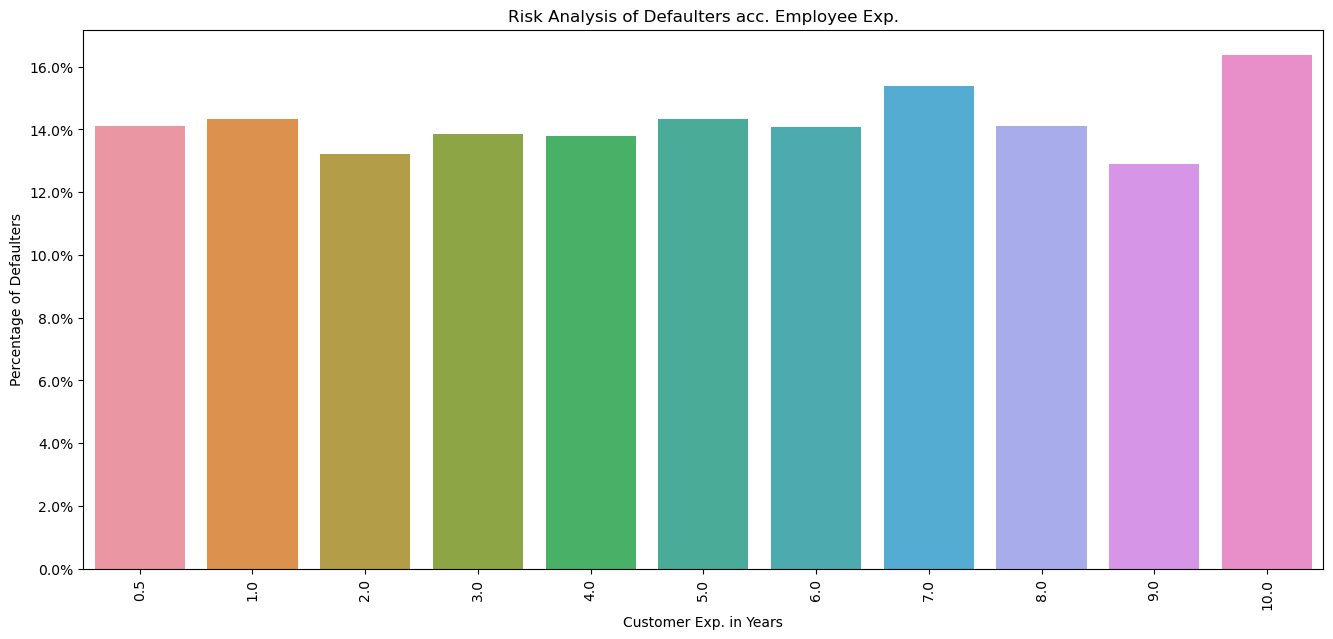

In [94]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sns.barplot(x=emp_df.index,y='defaulter_perc',data=emp_df)
ax.set(xlabel='Customer Exp. in Years', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee Exp.')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

##### Inferences:
* Employees with 10 years of experience show the highest percentage of defaulters (around 16%).There doesn't seem to be a linear relationship between the number of years of experience and the risk of default. Instead, defaulters are spread across different experience levels.
* Employment length alone may not be a strong indicator of loan repayment ability, and other factors might play a significant role in determining the likelihood of default.

## Risk Analysis of Defaulters acc. Home Ownership

In [99]:
# Calculate the percentage of loan defaulters according to home ownership
home_df = pd.DataFrame(round(100 * defaulters_df['home_ownership'].value_counts() / df['home_ownership'].value_counts(), 2))

# Rename the column that contains the percentages
home_df.rename(columns={home_df.columns[0]: 'defaulter_perc'}, inplace=True)

# Sort by 'defaulter_perc' in descending order
home_df.sort_values(by='defaulter_perc', ascending=False, inplace=True)

# Drop any rows with missing values
home_df.dropna(inplace=True)

# Display the resulting DataFrame
home_df


,defaulter_perc
home_ownership,
OTHER,18.75
RENT,15.33
OWN,14.85
MORTGAGE,13.66


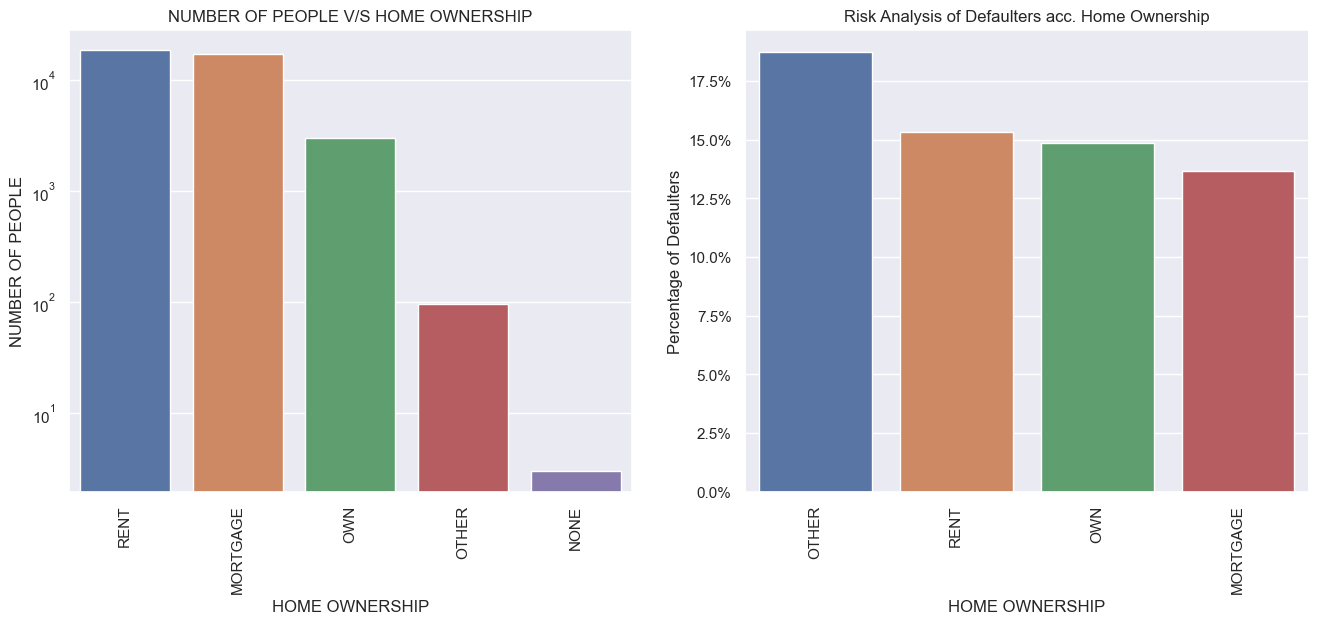

In [108]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='home_ownership',data=df,order=df['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1, 2, 2)
#plt.pie(home_df['defaulter_perc'], labels = home_df.index,autopct='%.2f%%')
ax=sns.barplot(x=home_df.index,y='defaulter_perc',data=home_df)
ax.set(xlabel='HOME OWNERSHIP', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Home Ownership')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=90)
plt.show()

##### Inferences:
* Home Ownership and Default Risk: Borrowers with MORTGAGE have the lowest default risk, while those with OTHER followed by rent, home ownership status have the highest default risk.
* Majority of people are in rented house.
  

## DTI vs Employee Experience

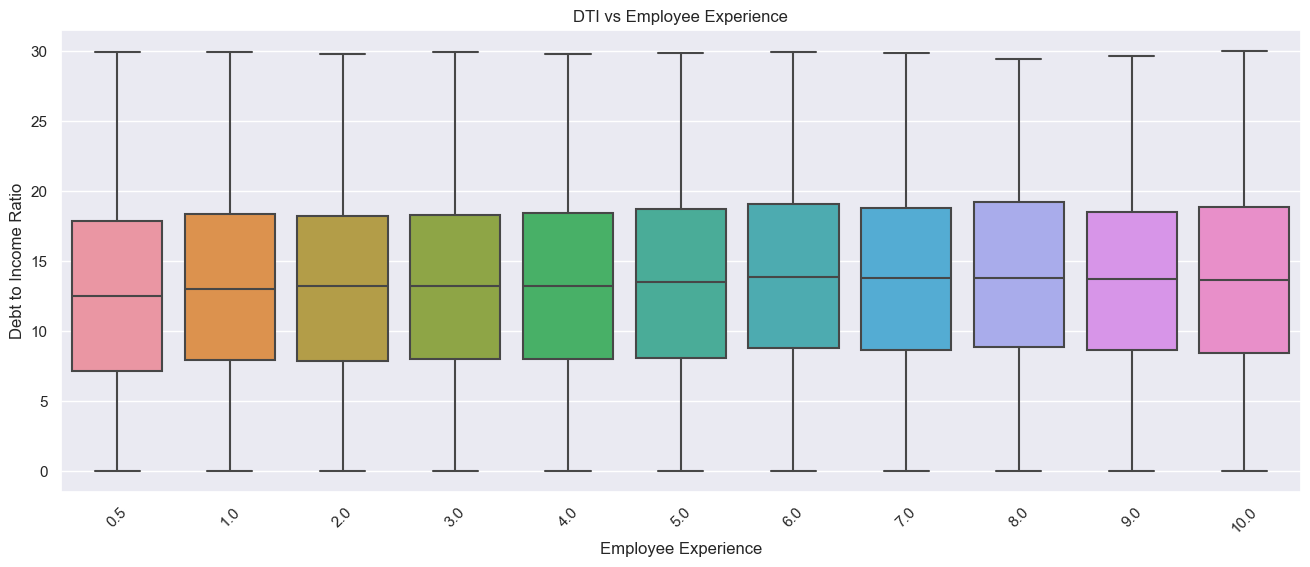

In [111]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x='emp_length_years', y='dti', data=df)
ax.set(xlabel='Employee Experience', ylabel='Debt to Income Ratio', title='DTI vs Employee Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

##### Infernces:
* More experienced employees tend to have a lower DTI, indicating better financial stability.Less experienced employees show a higher DTI, suggesting a higher risk of default. Borrowers with high DTI and low experience are more likely to default.

## Loan Amount vs Employee Experience

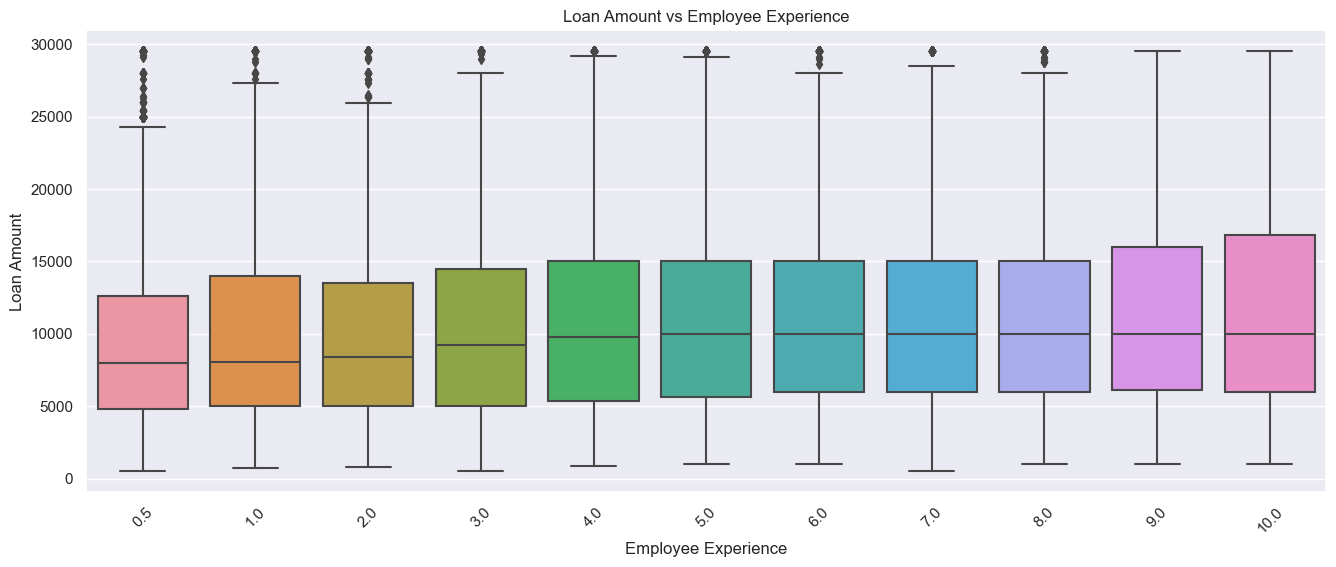

In [113]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x='emp_length_years', y='loan_amnt', data=df)
ax.set(xlabel='Employee Experience', ylabel='Loan Amount', title='Loan Amount vs Employee Experience')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.show()

##### Inferences:
 * More experienced employees tend to receive higher loan amounts, indicating trust in their repayment ability.Less experienced employees are     granted lower loan amounts, possibly due to perceived higher risk.
 * Borrowers with low experience and high loan amounts might be at higher risk of default.

## INTEREST RATE vs EMPLOYEE GRADES

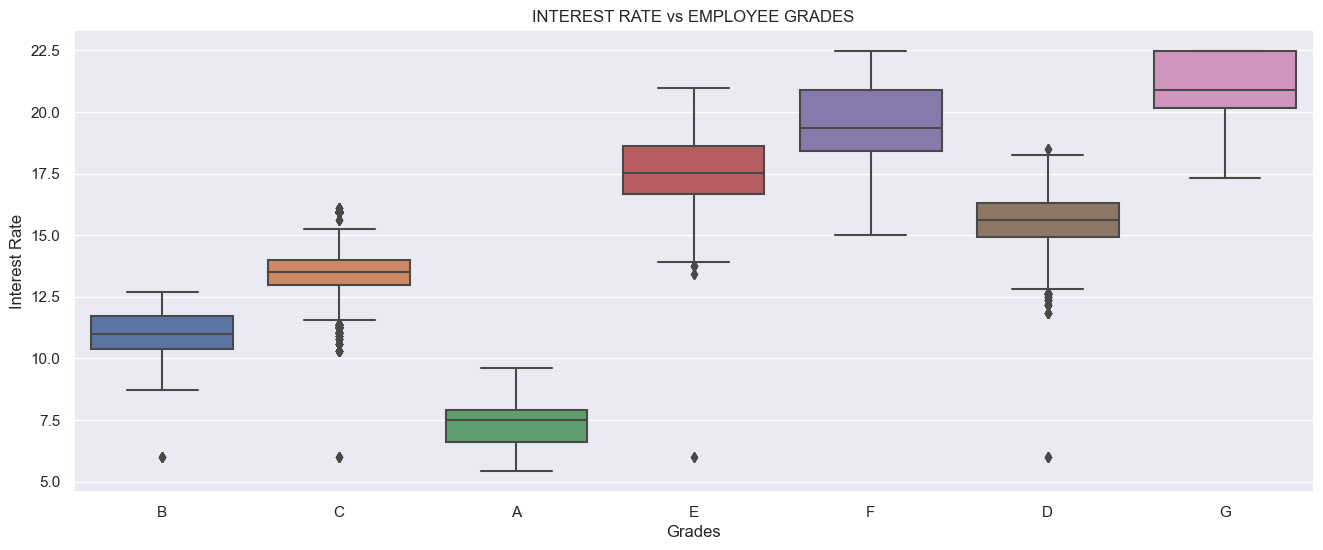

In [114]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(x='grade',y='int_rate',data=df,)
ax.set(xlabel='Grades', ylabel='Interest Rate',title='INTEREST RATE vs EMPLOYEE GRADES')
plt.show()

##### Inferences:
* Employees with lower grades (e.g., G) tend to receive higher interest rates, indicating a higher perceived risk.Employees with higher grades (e.g., A) are offered lower interest rates, suggesting they are considered lower risk.
*  Borrowers with lower grades and higher interest rates are more likely to default.

In [116]:
grade_group = df.groupby('grade')
grade_group['int_rate'].median()

grade
A     7.49
B    10.99
C    13.49
D    15.62
E    17.51
F    19.36
G    20.90
Name: int_rate, dtype: float64

In [118]:
emp_group = df.groupby('emp_length_years')
emp_group['loan_amnt'].median()

emp_length_years
0.5      8000.0
1.0      8050.0
2.0      8400.0
3.0      9250.0
4.0      9750.0
5.0     10000.0
6.0     10000.0
7.0     10000.0
8.0     10000.0
9.0     10000.0
10.0    10000.0
Name: loan_amnt, dtype: float64

## Risk Analysis of Defaulters acc. Employee State (TOP 10)

In [121]:
#calculate the percentage of loan defaulters according to address of a state
state_df=pd.DataFrame(data=round((100*defaulters_df['addr_state'].value_counts())/df['addr_state'].value_counts(),2))
state_df.rename(columns={state_df.columns[0]:'defaulter_perc'},inplace=True)
state_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
state_df=state_df.head(10)
state_df

,defaulter_perc
addr_state,
NE,60.00
NV,22.59
SD,19.67
AK,19.23
FL,18.09
HI,16.97
MO,16.89
ID,16.67
NM,16.39


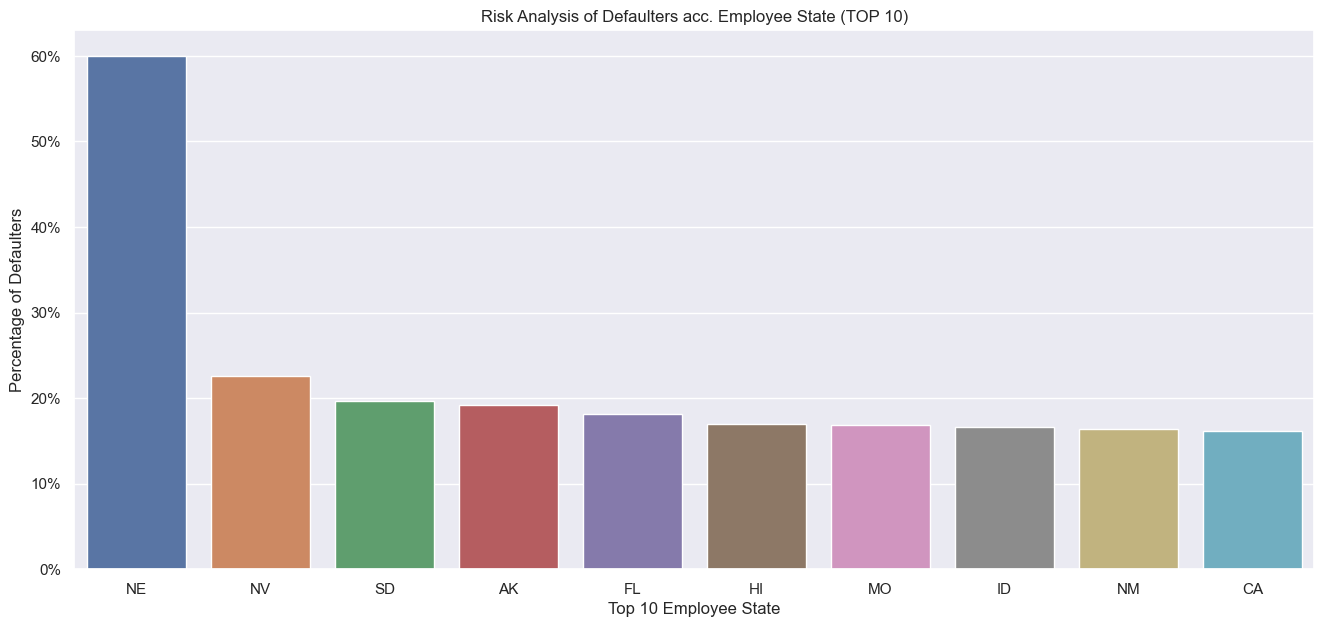

In [122]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sns.barplot(x=state_df.index,y='defaulter_perc',data=state_df)
ax.set(xlabel='Top 10 Employee State', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Employee State (TOP 10)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

###### Inferences:
* The state NE has the highest percentage of defaulters, close to 60%, indicating a significant risk factor.States like NV, SD, and AK also show higher default rates, suggesting regional risk patterns
* Borrowers from states with higher default rates might be considered higher risk.

## Risk Analysis of Defaulters by Loan Term

In [127]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term_months'].value_counts())/df['term_months'].value_counts(),2))
term_df.rename(columns={term_df.columns[0]:'defaulter_perc'},inplace=True)
term_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_df

,defaulter_perc
term_months,
60,25.29
36,11.06


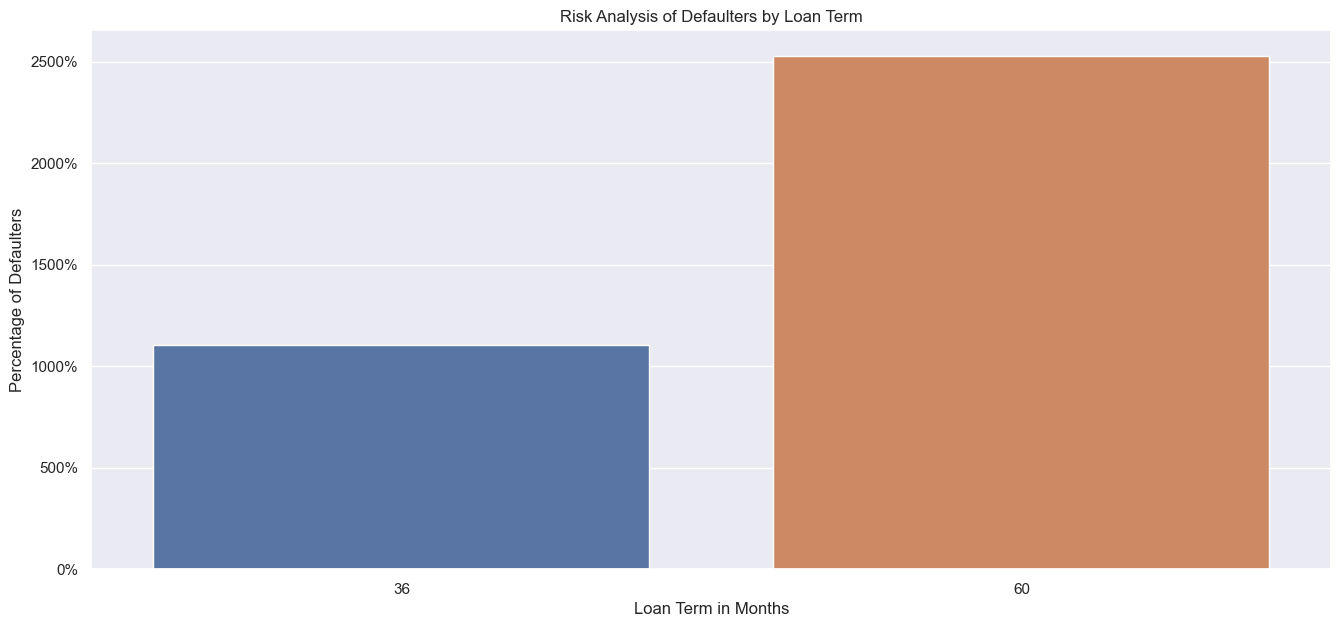

In [128]:
plt.figure(figsize=(16, 7))

ax = sns.barplot(x=term_df.index, y='defaulter_perc', data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters', title='Risk Analysis of Defaulters by Loan Term')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Use 1.0 if your values are in [0, 1] range
plt.show()

##### Inferences:
* Borrowers with a 60-month loan term have a significantly higher default rate compared to those with a 36-month term.
* Borrowers opting for longer loan terms (e.g., 60 months) are more likely to default.

## Growth of LendingClub Over Years

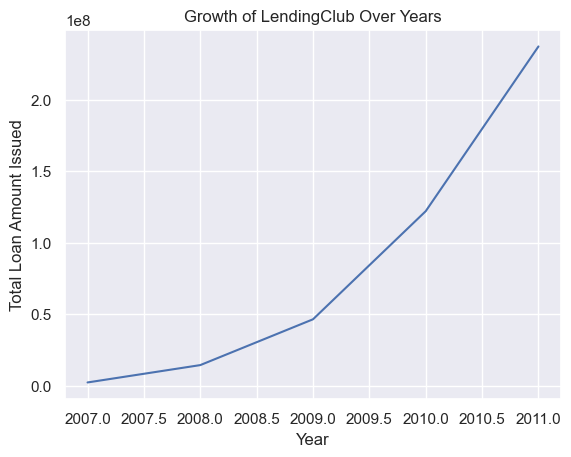

In [129]:
df.groupby('issue_year')['loan_amnt'].sum().plot(kind='line')
plt.title('Growth of LendingClub Over Years')
plt.xlabel('Year')
plt.ylabel('Total Loan Amount Issued')
plt.show()

##### Inferences:
* Sharp Growth: The total loan amount issued by LendingClub has shown a sharp upward trend from 2007 to 2011, indicating a significant increase in lending activities.
* Rising Demand: The consistent growth suggests a rising demand for loans, which could be due to increased borrower trust and market expansion.
* Potential Risks: With the increase in loan issuance, there might be a corresponding rise in the risk of defaults, necessitating robust risk management strategies.

## Trend of Defaults Over Years

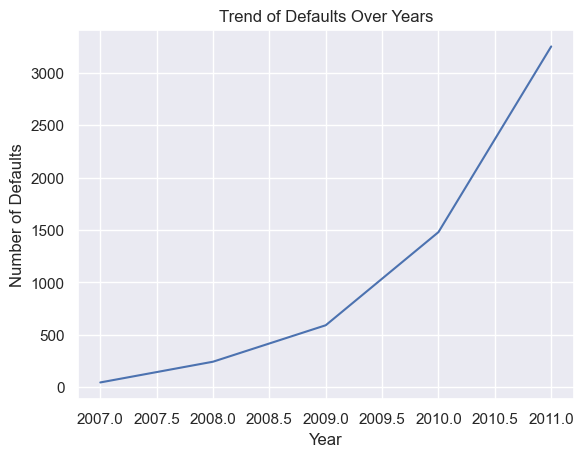

In [130]:
defaults_over_years = df[df['loan_status'] == 1].groupby('issue_year').size()
defaults_over_years.plot(kind='line')
plt.title('Trend of Defaults Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Defaults')
plt.show()

##### Inferences:
* Sharp Increase: The number of defaults has shown a sharp upward trend from 2007 to 2011, with a particularly steep rise after 2010.
* Sharp Increase: The number of defaults has shown a sharp upward trend from 2007 to 2011, with a particularly steep rise after 2010.

# Conclusions:
These insights provide valuable information for developing risk assessment models and tailoring lending practices. For instance:

* Enhanced Risk Assessment: Lenders can refine their criteria based on loan amounts, interest rates, DTI ratios, and credit grades to better evaluate borrower risk.
* Targeted Interventions: Identifying high-risk borrowers (e.g., those with high DTI or low credit scores) allows for customized loan products or financial education initiatives to mitigate default risk.
* Market Strategy Adjustments: Recognizing regional differences in default rates can inform targeted marketing and outreach strategies to potential borrowers.
* Policy Formulation: Policymakers can leverage these insights to implement regulations that promote responsible lending and protect vulnerable borrowers.
By incorporating these findings into decision-making frameworks, financial institutions can enhance their risk management approaches, ultimately leading to more sustainable lending practices and improved borrower outcomes.
